In [30]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [13]:
df = pd.DataFrame()
df['windy'] = [0, 1, 1, 0, 0, 1]
df['rainy'] = [1, 0, 0, 0, 0, 1]
df['daytime'] = [0, 1, 1, 0, 1, 1]
df['went_for_run'] = [1, 0, 1, 1, 0, 0]
df

,windy,rainy,daytime,went_for_run
0,0,1,0,1
1,1,0,1,0
2,1,0,1,1
3,0,0,0,1
4,0,0,1,0
5,1,1,1,0


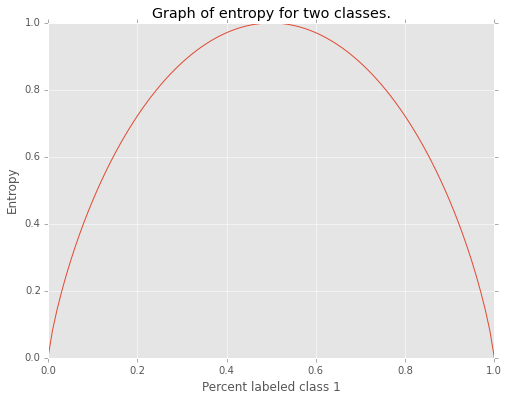

In [35]:
# Binary splits mean the fomula for entropy is simple
# p is the proportion which is in the positive class
def entropy(p):
    if p == 1 or p == 0:
        return 0
    return -(p * np.log2(p) + (1-p) * np.log2(1-p))

x = np.linspace(0,1,100)
y = [entropy(t) for t in x]

plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.title("Graph of entropy for two classes.")
plt.xlabel("Percent labeled class 1")
plt.ylabel("Entropy")
plt.show()

In [36]:
print "Information gain for splitting on windy:"
print entropy(1/2) - (1/2 * entropy(1/3) + 1/2 * entropy(2/3))
print "Information gain for splitting on rainy:"
print entropy(1/2) - (1/3 * entropy(1/2) + 2/3 * entropy(1/2))
print "Information gain for splitting in daytime:"
print entropy(1/2) - (2/3 * entropy(1/4) + 1/3 * entropy(1))

print "\n"
print "Therefore, split on daytime."

Information gain for splitting on windy:
0.0817041659455
Information gain for splitting on rainy:
0.0
Information gain for splitting in daytime:
0.459147917027


Therefore, split on daytime.


In [19]:
print "daytime = 0 has all labels == 1. Therefore, create leaf note with label 1. \n"

df[df.daytime == 1]

daytime = 0 has all labels == 1. Therefore, create leaf note with label 1. 



,windy,rainy,daytime,went_for_run
1,1,0,1,0
2,1,0,1,1
4,0,0,1,0
5,1,1,1,0


In [22]:
print "Gain for daytime = 1 split on windy:"
print entropy(1/4) - (3/4 * entropy(1/3) + 1/4 * entropy(0))
print "Gain for daytime = 1 split on rainy:"
print entropy(1/4) - (1/4 * entropy(0) + 3/4 * entropy(1/3))

print "\n"
print "They are the same, so pick at random. Let's pick windy."

Gain for daytime = 1 split on windy:
0.122556248918
Gain for daytime = 1 split on rainy:
0.122556248918


They are the same, so pick at random. Let's pick windy.


In [23]:
print "windy = 0 has label 0. Make leaf node with label 0. \n"

df[(df.daytime == 1) & (df.windy == 1)]

windy = 0 has label 0. Make leaf node with label 0. 



,windy,rainy,daytime,went_for_run
1,1,0,1,0
2,1,0,1,1
5,1,1,1,0
